# Exploring the Intersection of Race/Ethnicity, COVID-19, and Breast Cancer

In [21]:
#!pip install pyreadr

import pyreadr
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

raw_data = pyreadr.read_r('48_-_breast_cancer_data.RData')['out']
raw_data.to_csv('dataset')

raw_data

,der_ordinal_v1a,der_days_fu,der_deadbinary,der_dead30,der_mv,der_ICU,der_hosp,der_AKI_comp,der_MOF_comp,der_coinfection_any,...,der_txline,der_heme,der_metastatic,der_met_bone,der_met_liver,der_met_lung_v2,der_age_trunc,der_CV_event_v2,der_pulm_event,der_GI_event
0,0,30.0,No,No,No,No,No,No,No,No,...,First line,0,Missing/Unknown,NaN,NaN,NaN,58.0,No,Yes,No
1,0,180.0,No,No,No,No,No,No,No,NaN,...,Non-curative NOS,0,Yes,Yes,No,No,67.0,No,No,No
2,1,10.5,No,No,No,No,Yes,No,No,NaN,...,First line,0,No,No,No,No,42.0,No,No,No
3,1,180.0,No,No,No,No,Yes,No,No,No,...,Untreated in last 12 months,0,Yes,Yes,Yes,No,49.0,No,Yes,No
4,0,180.0,No,No,No,No,No,No,No,No,...,First line,0,No,No,No,No,47.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,0,180.0,No,No,No,No,No,No,No,No,...,First line,0,No,No,No,No,58.0,No,No,No
1379,1,30.0,No,No,No,No,Yes,Yes,No,No,...,Curative NOS,0,Yes,No,No,No,73.0,No,No,No
1380,0,135.0,No,No,No,No,No,No,No,No,...,Untreated in last 12 months,0,No,No,No,No,60.0,No,No,No
1381,1,10.5,No,No,No,No,Yes,No,No,No,...,Untreated in last 12 months,0,No,No,No,No,60.0,No,Yes,No


In [22]:
raw_data.columns

Index(['der_ordinal_v1a', 'der_days_fu', 'der_deadbinary', 'der_dead30',
       'der_mv', 'der_ICU', 'der_hosp', 'der_AKI_comp', 'der_MOF_comp',
       'der_coinfection_any', 'der_sepsis_comp', 'der_bleeding_comp',
       'der_rem', 'der_hcq', 'der_steroids_c19', 'der_other_tx_c19_v2',
       'der_o2_ever', 'der_race_v2', 'der_insurance', 'der_smoking2',
       'der_obesity', 'der_card', 'der_pulm', 'der_renal', 'der_dm2',
       'der_ecogcat2', 'der_breast_biomarkers', 'der_cancer_status_v4',
       'der_cancer_tx_timing_v2', 'der_cancertr_none', 'der_any_cyto',
       'der_any_targeted', 'der_her2_3m', 'der_cdk46i_3m', 'der_other_3m',
       'der_any_endo', 'der_any_immuno', 'der_any_local', 'der_any_other',
       'der_region_v2', 'urban_rural', 'der_site_type',
       'severity_of_covid_19_v2', 'der_tr_intent', 'der_txline', 'der_heme',
       'der_metastatic', 'der_met_bone', 'der_met_liver', 'der_met_lung_v2',
       'der_age_trunc', 'der_CV_event_v2', 'der_pulm_event', 'der_GI_e

In [23]:
clean_data = pd.DataFrame({
    'Race/Ethnicity': raw_data['der_race_v2'],
    'Cancer Status': raw_data['der_cancer_status_v4'],
    'COVID-19 Severity': raw_data['severity_of_covid_19_v2'],
    'Death (Binary)': raw_data['der_deadbinary'],
    'Death (30days)':raw_data['der_dead30'],
    'Mechanical Ventilation': raw_data['der_mv'],
    'ICU Admission': raw_data['der_ICU'],
    'Hospitalization': raw_data['der_hosp'],
    'Cardiovascular Event': raw_data['der_CV_event_v2'],
    'Pulmonary Event': raw_data['der_pulm_event'],
    'GI Event': raw_data['der_GI_event'],
    'Bleeding Complication': raw_data['der_bleeding_comp'],
    'Acute Kidney Injury': raw_data['der_AKI_comp'],
    'Multisystem Organ Failure': raw_data['der_MOF_comp'],
    'Coinfection': raw_data['der_coinfection_any'],
    'Remdesivir Treatment': raw_data['der_rem'],
    'Hydroxychloroquine Treatment': raw_data['der_hcq'],
    'Steroids Treatment': raw_data['der_steroids_c19'],
    'Other COVID-19 Treatment': raw_data['der_other_tx_c19_v2']})


clean_data

,Race/Ethnicity,Cancer Status,COVID-19 Severity,Death (Binary),Mechanical Ventilation,ICU Admission,Hospitalization,Cardiovascular Event,Pulmonary Event,GI Event,Bleeding Complication,Acute Kidney Injury,Multisystem Organ Failure,Coinfection,Remdesivir Treatment,Hydroxychloroquine Treatment,Steroids Treatment,Other COVID-19 Treatment
0,Non-Hispanic White,Active and responding,Severe,No,No,No,No,No,Yes,No,No,No,No,No,No,Yes,No,No
1,Hispanic,Active and stable,Mild,No,No,No,No,No,No,No,No,No,No,NaN,No,No,No,Yes
2,Hispanic,NaN,Moderate,No,No,No,Yes,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN
3,Other,Unknown,Moderate,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No
4,Hispanic,Active and responding,Mild,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,Other,Active and responding,Mild,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1379,Non-Hispanic Black,Active and responding,Moderate,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No
1380,Non-Hispanic White,"Remission or no evidence of disease, >5 years",Mild,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
1381,Non-Hispanic Black,Unknown,Moderate,No,No,No,Yes,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes


In [24]:
clean_data.columns

Index(['Race/Ethnicity', 'Cancer Status', 'COVID-19 Severity',
       'Death (Binary)', 'Mechanical Ventilation', 'ICU Admission',
       'Hospitalization', 'Cardiovascular Event', 'Pulmonary Event',
       'GI Event', 'Bleeding Complication', 'Acute Kidney Injury',
       'Multisystem Organ Failure', 'Coinfection', 'Remdesivir Treatment',
       'Hydroxychloroquine Treatment', 'Steroids Treatment',
       'Other COVID-19 Treatment'],
      dtype='object')

In [26]:
clean_data['Race/Ethnicity'].dropna()
race_counts = clean_data['Race/Ethnicity'].value_counts()
race_counts

Race/Ethnicity
Non-Hispanic White    736
Non-Hispanic Black    289
Hispanic              235
Other                  78
Non-Hispanic AAPI      45
Name: count, dtype: int64

Text(0.5, 1.0, 'Race/Ethnic Distribution')

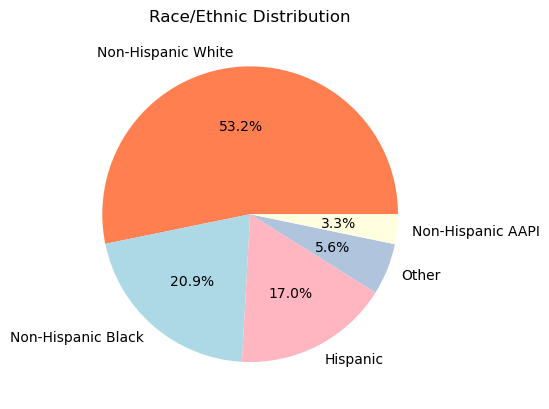

In [44]:
colors = ['coral', 'lightblue', 'lightpink', 'lightsteelblue', 'lightyellow']
plt.pie(race_counts, labels=race_counts.index, colors=colors, autopct='%1.1f%%')
plt.title('Race/Ethnic Distribution')

In [25]:
#Race/Ethnic Distribution and COVID-19
#Race/Ethnic Distribution and Breast Cancer
#Severity of Breast Cancer and COVID-19

## Race/Ethnic Distribution and COVID-19

In [72]:
covid_severity = pd.DataFrame(clean_data[['Race/Ethnicity','COVID-19 Severity']])
covid_severity


,Race/Ethnicity,COVID-19 Severity
0,Non-Hispanic White,Severe
1,Hispanic,Mild
2,Hispanic,Moderate
3,Other,Moderate
4,Hispanic,Mild
...,...,...
1378,Other,Mild
1379,Non-Hispanic Black,Moderate
1380,Non-Hispanic White,Mild
1381,Non-Hispanic Black,Moderate


In [76]:
covid_data = covid_severity.loc[(clean_data['COVID-19 Severity'] != 'Unknown'), :]
new_covid_data = covid_data.set_index(['Race/Ethnicity'])
new_covid_data

,COVID-19 Severity
Race/Ethnicity,
Non-Hispanic White,Severe
Hispanic,Mild
Hispanic,Moderate
Other,Moderate
Hispanic,Mild
...,...
Other,Mild
Non-Hispanic Black,Moderate
Non-Hispanic White,Mild


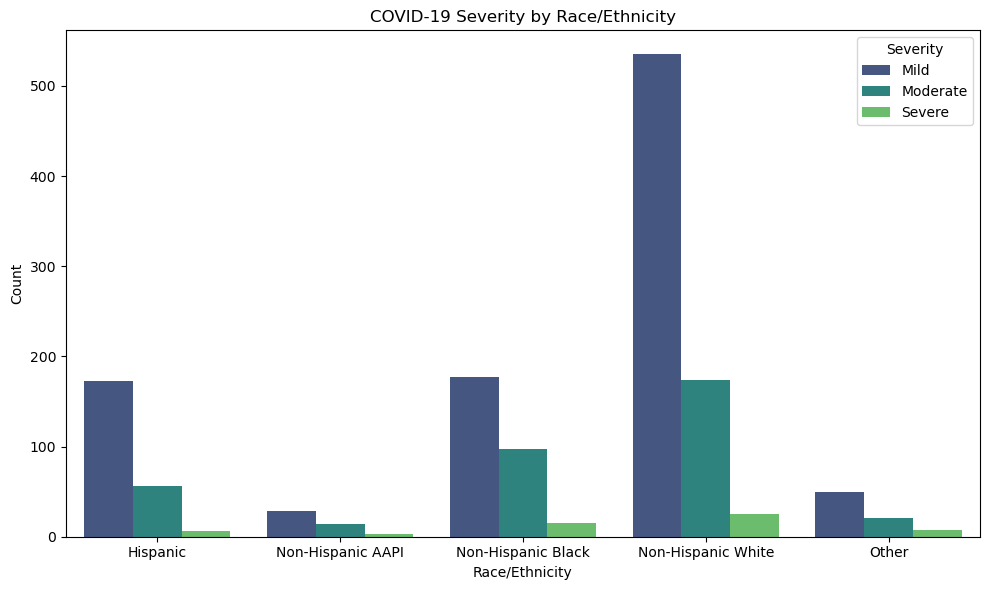

In [78]:
#chatgpt been used for coding in Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Race/Ethnicity', hue='COVID-19 Severity', data=covid_severity, palette='viridis')
plt.title('COVID-19 Severity by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.tight_layout()